In [2]:
import math
import random

import matplotlib.pyplot as plt
import numpy as np

from utils import (
    Bernoulli,
    Exponential,
    Bandit,
    FTL,
    UniformExploration,
    OneBanditOneLearnerOneRun,
    UCB1,
    ThompsonSampling,
)

In [3]:
def get_selections_rewards(bandit, strategy, timeHorizon, iterations=1000):
    all_final_selections = []
    all_total_rewards = []
    all_strategies = []
    for _ in range(iterations):
        s, r = OneBanditOneLearnerOneRun(
            bandit, strategy, timeHorizon
        )
        all_strategies.append((s.count(0), s.count(1), s.count(2)))
        all_final_selections.append(s[-1])
        all_total_rewards.append(sum(r))
    return all_final_selections, all_total_rewards, all_strategies

In [4]:
bandit = Bandit(
    [
        Exponential(1), 
        Exponential(5), 
        Exponential(12)
    ]
)

## Uniform Exploration

In [53]:
strategy_0 = UniformExploration(bandit.nbArms)
timeHorizon_0 = 1000
selections_0, rewards_0 = OneBanditOneLearnerOneRun(
    bandit, strategy_0, timeHorizon_0
)

In [54]:
(
    all_final_selections_0, 
    all_total_rewards_0, 
    all_strategies_0
) = get_selections_rewards(
    bandit, strategy_0, timeHorizon_0
)

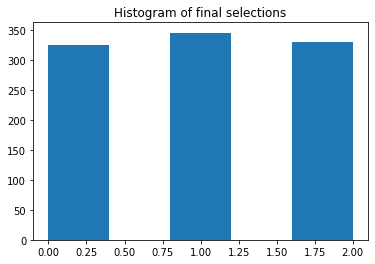

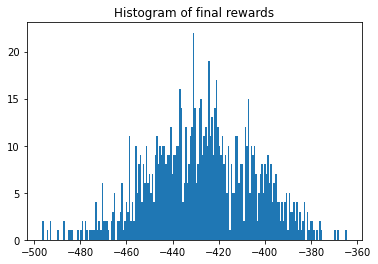

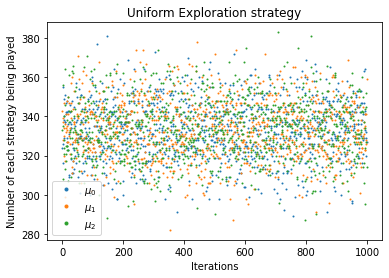

In [55]:
plt.hist(all_final_selections_0, bins=5)
plt.title("Histogram of final selections")
plt.show();
plt.hist(all_total_rewards_0, bins=200)
plt.title("Histogram of final rewards")
plt.show();
plt.plot(
    list(range(len(all_strategies_0))), 
    all_strategies_0, 
    linestyle='None', 
    marker='o',
    ms=1
)
plt.title("Uniform Exploration strategy")
plt.xlabel("Iterations")
plt.ylabel("Number of each strategy being played")
plt.legend([f"$μ_{i}$" for i, _ in enumerate(bandit.arms)], markerscale=3)

## FTL algorithm

In [56]:
strategy_1 = FTL(bandit.nbArms)
timeHorizon_1 = 1000
selections_1, rewards_1 = OneBanditOneLearnerOneRun(
    bandit, strategy_1, timeHorizon_1
)

In [57]:
(
    all_final_selections_1, 
    all_total_rewards_1, 
    all_strategies_1
) = get_selections_rewards(
    bandit, strategy_1, timeHorizon_1
)

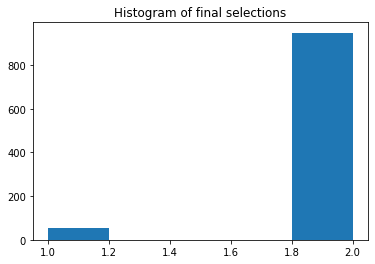

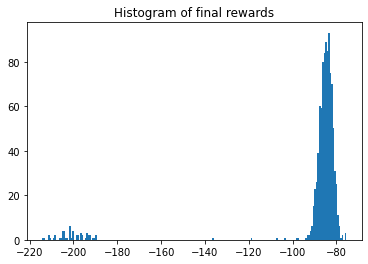

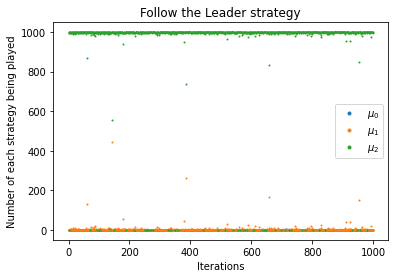

In [58]:
plt.hist(all_final_selections_1, bins=5)
plt.title("Histogram of final selections")
plt.show();
plt.hist(all_total_rewards_1, bins=200)
plt.title("Histogram of final rewards")
plt.show();
plt.plot(
    list(range(len(all_strategies_1))), 
    all_strategies_1, 
    linestyle='None', 
    marker='o',
    ms=1
)
plt.title("Follow the Leader strategy")
plt.xlabel("Iterations")
plt.ylabel("Number of each strategy being played")
plt.legend([f"$μ_{i}$" for i, _ in enumerate(bandit.arms)], markerscale=3)

## UCB strategy

In [38]:
strategy_2 = UCB1(bandit.nbArms)
timeHorizon_2 = 1000
selections_2, rewards_2 = OneBanditOneLearnerOneRun(
    bandit, strategy_2, timeHorizon_2
)

In [39]:
(
    all_final_selections_2, 
    all_total_rewards_2, 
    all_strategies_2
) = get_selections_rewards(
    bandit, strategy_2, timeHorizon_2
)

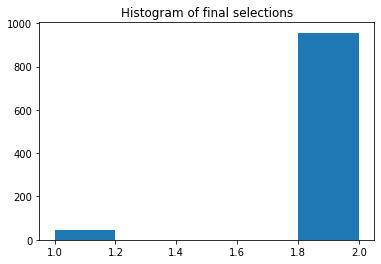

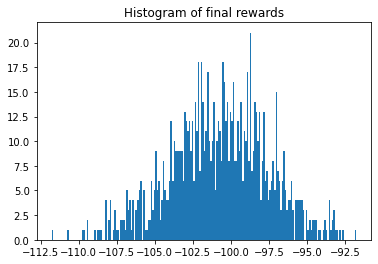

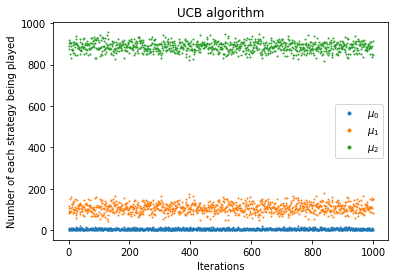

In [52]:
plt.hist(all_final_selections_2, bins=5)
plt.title("Histogram of final selections")
plt.show();
plt.hist(all_total_rewards_2, bins=200)
plt.title("Histogram of final rewards")
plt.show();
plt.plot(
    list(range(len(all_strategies_2))), 
    all_strategies_2, 
    linestyle='None', 
    marker='o',
    ms=1
)
plt.title("UCB algorithm")
plt.xlabel("Iterations")
plt.ylabel("Number of each strategy being played")
plt.legend([f"$μ_{i}$" for i, _ in enumerate(bandit.arms)], markerscale=3)

## Thompson sampling

In [15]:
class Thompson_Sampling:
    """
    Thompson Sampling with Beta(a,b) prior and Bernoulli likelihood
    """
    def __init__(self, nbArms, alpha=1, beta=1):
        self.nbArms = nbArms
        self.alpha = alpha
        self.beta = beta
        self.clear()

    def clear(self):
        self.nbDraws = np.zeros(self.nbArms)
        self.cumRewards = np.zeros(self.nbArms)
        self.t = 0

    def beta_function(self, arm_id):
        return np.random.beta(
            max(self.alpha + self.cumRewards[arm_id], 1),
            max(self.beta + self.nbDraws[arm_id] - self.cumRewards[arm_id], 1)
        )
    
    def chooseArmToPlay(self):
        """
        Choose the arm to play according to the UCB1 strategy
        """
        thompson_sample = np.array([
            self.beta_function(arm_id) for arm_id in range(self.nbArms)
        ])
        return np.argmax(thompson_sample)
        
    def receiveReward(self, arm, reward):
        self.t = self.t + 1
        self.nbDraws[arm] = self.nbDraws[arm] + 1
        self.cumRewards[arm] = self.cumRewards[arm] + reward

    def apply_binarisation_trick(self):
        pass

    def name(self):
        return "Thomson Sampling"



In [28]:
# bandit_rand = Bandit(
#     [
#         Bernoulli(0.5), 
#         Bernoulli(0.55), 
#         Bernoulli(0.6)
#     ]
# )

bandit_rand = Bandit(
    [
        Exponential(1), 
        Exponential(5), 
        Exponential(12)
    ]
)

In [29]:
strategy_3 = Thompson_Sampling(
    bandit_rand.nbArms, alpha=2, beta=5
)
timeHorizon_3 = 1000
selections_3, rewards_3 = OneBanditOneLearnerOneRun(
    bandit_rand, strategy_3, timeHorizon_3
)

In [30]:
(
    all_final_selections_3, 
    all_total_rewards_3, 
    all_strategies_3
) = get_selections_rewards(
    bandit, strategy_3, timeHorizon_3
)

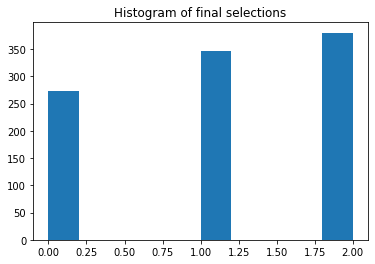

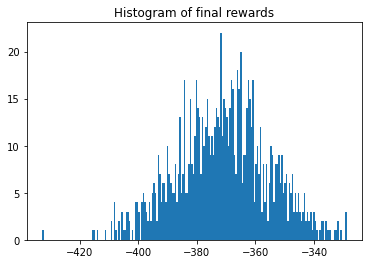

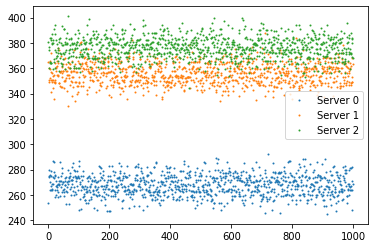

In [31]:
plt.hist(all_final_selections_3)
plt.title("Histogram of final selections")
plt.show();
plt.hist(all_total_rewards_3, bins=200)
plt.title("Histogram of final rewards")
plt.show();
plt.plot(
    list(range(len(all_strategies_3))), 
    all_strategies_3, 
    linestyle='None', 
    marker='o',
    ms=1
)
plt.legend([f"Server {i}" for i, _ in enumerate(bandit.arms)]);